In [9]:
# https://medium.com/@visrow/face-to-face-with-tomorrow-ai-enhanced-face-detection-for-the-modern-age-55bd37d0b1b4

import os
from tqdm import tqdm
from glob import glob
import numpy as np
import cv2 as cv2
import insightface
from insightface.app import FaceAnalysis
from insightface.data  import get_image as ins_get_image

app = FaceAnalysis(name='buffalo_l')

/Users/siddarthreddy/workspace/duodecimal/facerecog/env/lib/python3.11/site-packages/onnxruntime/capi/onnxruntime_inference_collection.py:115: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'CoreMLExecutionProvider, AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/siddarthreddy/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/siddarthreddy/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/siddarthreddy/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/siddarthreddy/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/siddarthreddy/.insightface/models/buffalo_l/w600k_r50.onnx recognit

In [23]:
image_path = "image.png"
image = cv2.imread(image_path)
app.prepare(ctx_id=0, det_size=(962, 1367))

set det-size: (962, 1367)


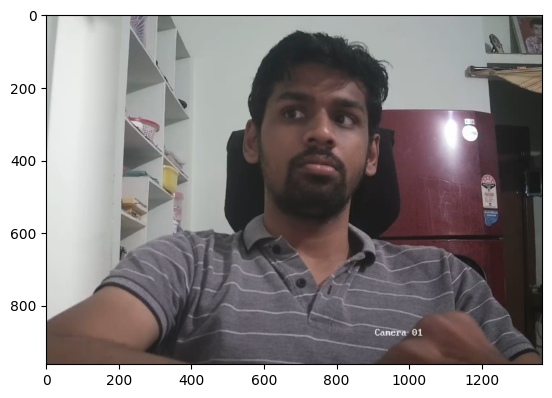

In [24]:
import matplotlib.pyplot as plt
plt.imshow(image[:,:,::-1])

In [25]:
faces = app.get(image)

ValueError: operands could not be broadcast together with shapes (40800,) (41040,) 

In [26]:
app = FaceAnalysis()
app.prepare(ctx_id=-1)

/Users/siddarthreddy/workspace/duodecimal/facerecog/env/lib/python3.11/site-packages/onnxruntime/capi/onnxruntime_inference_collection.py:115: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'CoreMLExecutionProvider, AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/siddarthreddy/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/siddarthreddy/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/siddarthreddy/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/siddarthreddy/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/siddarthreddy/.insightface/models/buffalo_l/w600k_r50.onnx recognit

In [27]:
image = np.asarray(cv2.imread("image.png"))

In [28]:
app.get(image)

[{'bbox': array([589.77405, 129.22926, 888.282  , 537.52295], dtype=float32),
  'kps': array([[688.7808 , 277.70303],
         [824.2382 , 291.95154],
         [763.29987, 328.45096],
         [692.35425, 418.1354 ],
         [806.5312 , 429.35843]], dtype=float32),
  'det_score': np.float32(0.82707524),
  'landmark_3d_68': array([[ 5.79736816e+02,  3.05998505e+02,  2.07421341e+02],
         [ 5.83689819e+02,  3.48768982e+02,  1.93862442e+02],
         [ 5.87590942e+02,  3.91760132e+02,  1.76572083e+02],
         [ 5.94146790e+02,  4.31096863e+02,  1.52514236e+02],
         [ 6.07826721e+02,  4.62575043e+02,  1.12945786e+02],
         [ 6.29967896e+02,  4.84953827e+02,  8.06260147e+01],
         [ 6.58553040e+02,  4.99290894e+02,  5.57261429e+01],
         [ 6.94737000e+02,  5.05696991e+02,  2.74887257e+01],
         [ 7.42716736e+02,  5.16735229e+02,  1.79689808e+01],
         [ 7.85011353e+02,  5.17673218e+02,  4.43373947e+01],
         [ 8.16489319e+02,  5.14712708e+02,  8.35050278e

In [29]:
faces = app.get(image)

annotated_img = image.copy()

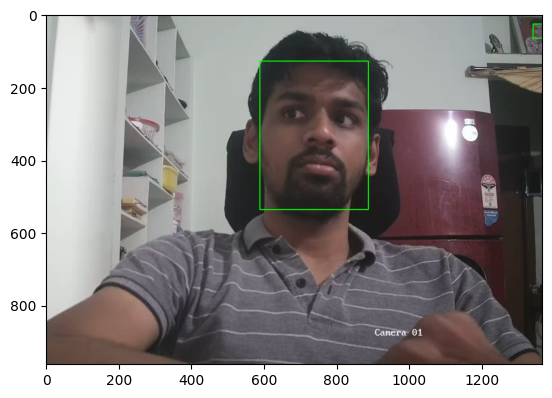

In [31]:
for face in faces:
    bbox = face.bbox.astype(int)
    cv2.rectangle(annotated_img, (bbox[0], bbox[1]), (bbox[2], bbox[3]), (0, 255, 0), 2)
plt.imshow(annotated_img[:,:,::-1])

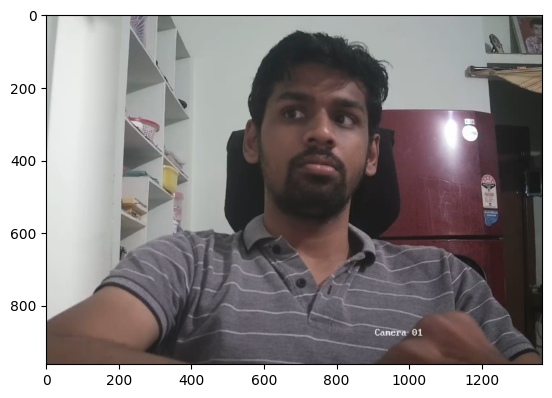

In [32]:
plt.imshow(image[:,:,::-1])

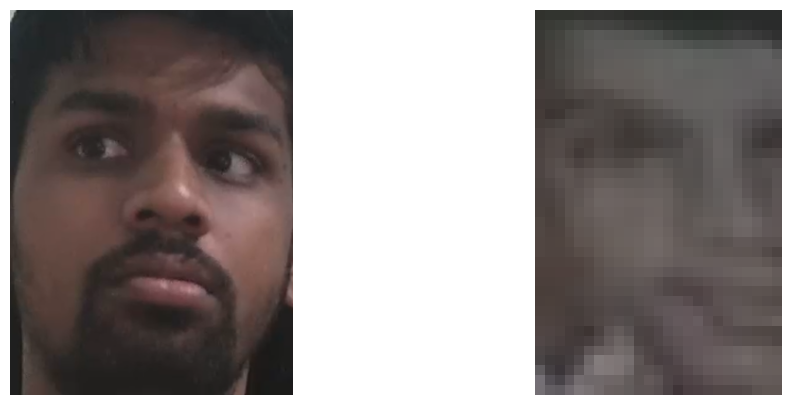

In [40]:
fig, axs = plt.subplots(1, len(faces), figsize=(12,5))
for i, face in enumerate(faces):
    bbox = face['bbox']
    bbox = [int(b) for b in bbox]
    axs[i].imshow(image[bbox[1]:bbox[3], bbox[0]:bbox[2], ::-1])
    axs[i].axis('off')

In [1]:
from deepface import DeepFace

In [28]:
def compare_face_similarity(img1, img2):
    from insightface.app import FaceAnalysis
    import cv2
    import numpy as np
    from numpy.linalg import norm

    app = FaceAnalysis(name='buffalo_s')
    app.prepare(ctx_id=0)
    img1_path = 'data/siddarth/1.jpeg'
    img2_path = 'webcam.jpeg'
    img1 = np.asarray(cv2.imread(img1_path))
    img2 = np.asarray(cv2.imread(img2_path))
    embed1 = app.get(img1)[0].normed_embedding
    embed2 = app.get(img2)[0].normed_embedding
    cos_sim = np.dot(embed1, embed2) / (norm(embed1) * norm(embed2))
    return round(float(cos_sim), 2)


In [40]:
data = DeepFace.verify(img1_path='data/siddarth/4.jpeg', img2_path='webcam.jpeg', model_name='ArcFace', detector_backend='retinaface')
print(data['verified'], data['distance'])

False 0.6895602117938048


In [41]:
data = DeepFace.verify(img1_path='data/siddarth/4.jpeg', img2_path='webcam.jpeg')
print(data['verified'], data['distance'])

True 0.6479632660160117


In [42]:
img1_path = 'data/siddarth/4.jpeg'
img2_path = 'webcam.jpeg'
compare_face_similarity(img1_path, img2_path)

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/siddarthreddy/.insightface/models/buffalo_s/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/siddarthreddy/.insightface/models/buffalo_s/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/siddarthreddy/.insightface/models/buffalo_s/det_500m.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/siddarthreddy/.insightface/models/buffalo_s/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/siddarthreddy/.insightface/models/buffalo_s/w600k_mbf.onnx recogni

0.52